In [1]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
vocab_size = 20000

In [3]:
def tokenize_sentence(sentence):

    sentence_strip_numbers = re.sub(r"[0-9]+", "", sentence)
    final_sentence = re.sub(
        r"!|@|#|$|%|^|&|:|;|'|<|>|/|-|=|(|)|", "", sentence_strip_numbers)
    final_sentence = re.sub('[\W\_]',' ', final_sentence)

    split_sentence = re.split('\s+', final_sentence)
    # new_sentence = [word_tokenize(word) for word in split_sentence]
    return split_sentence

In [4]:
def pre_model_processing(summary):
    tokenized_sentence = str(tokenize_sentence(summary))
    # print(tokenized_sentence)
    encoded_data = [one_hot(tokenized_sentence, vocab_size)]
    # print(encoded_data)
    return np.array(encoded_data[0])

In [6]:
amazon_data = pd.read_csv('../../dataset/amazon.csv')
amazon_data.head(10)

,Text,Score
0,The description and photo on this product need...,3
1,This was a great book!!!! It is well thought t...,5
2,"I am a first year teacher, teaching 5th grade....",5
3,I got the book at my bookfair at school lookin...,5
4,Hi! I'm Martine Redman and I created this puzz...,5
5,"My eight year old loves this game, whenever he...",5
6,The real joy of this movie doesn't lie in its ...,4
7,"Okay, Tim Burton is genuine. He haunts you wit...",3
8,"Boundaries, along with counseling, has given m...",5
9,120 colors? I say 120 sticks of fun! And a fre...,5


array([[<AxesSubplot:title={'center':'Score'}>]], dtype=object)

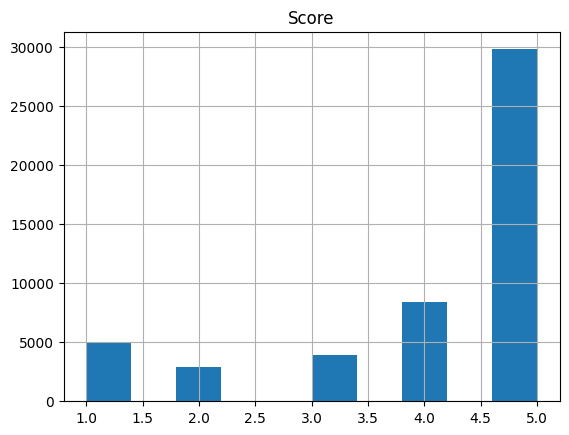

In [8]:
amazon_data.hist('Score')

In [9]:
summaries = amazon_data['Text']
summaries.head(10)

0    The description and photo on this product need...
1    This was a great book!!!! It is well thought t...
2    I am a first year teacher, teaching 5th grade....
3    I got the book at my bookfair at school lookin...
4    Hi! I'm Martine Redman and I created this puzz...
5    My eight year old loves this game, whenever he...
6    The real joy of this movie doesn't lie in its ...
7    Okay, Tim Burton is genuine. He haunts you wit...
8    Boundaries, along with counseling, has given m...
9    120 colors? I say 120 sticks of fun! And a fre...
Name: Text, dtype: object

In [10]:
summaries_list = summaries.to_numpy()
summaries_list

array(['The description and photo on this product needs to be changed to indicate this product is the BuffalOs version of this beef jerky.',
       'This was a great book!!!! It is well thought through, and you can easily imagine the events happening. The Westing Game itself is a great way to tie two things together. The events are well sequenced and exciting. Ellen Raskin wrote a wonderful book',
       "I am a first year teacher, teaching 5th grade. I have a special reading class with high comprehension levels. Reading this book to them was one of the best things I taught them this year. It expanded their minds by allowing them to put themselves in the characters place and was easy for the students to make mind movies. We even used up a whole reading class time in order to finish the book. The students couldn't wait to hear the end. An excellent book that I will be reading every year to my students.",
       ...,
       'This works great, but needs a better way to attach. We made our

In [11]:
max_len = 0
processed_data = []
for summary in summaries_list:
    processed_data.append(pre_model_processing(summary))

for summary in processed_data:
    if len(summary) > max_len:
        max_len = len(summary)


processed_data = pad_sequences(processed_data, maxlen=max_len, padding='post')



In [12]:
processed_data = np.array(processed_data)
processed_data

scaled_data = StandardScaler().fit_transform(processed_data)
scaled_data

array([[ 0.80189231,  0.77475124,  1.36862875, ..., -0.00447218,
        -0.00447218, -0.00447218],
       [ 1.30234334,  0.88726303,  0.32378497, ..., -0.00447218,
        -0.00447218, -0.00447218],
       [-0.46029786, -0.41308126,  0.32378497, ..., -0.00447218,
        -0.00447218, -0.00447218],
       ...,
       [ 1.30234334, -0.9726449 ,  0.83173485, ..., -0.00447218,
        -0.00447218, -0.00447218],
       [ 0.6687899 ,  1.66979098, -0.87024564, ..., -0.00447218,
        -0.00447218, -0.00447218],
       [-0.46029786, -0.96627984, -1.50040364, ..., -0.00447218,
        -0.00447218, -0.00447218]])

In [13]:
train_X = processed_data[:int(len(processed_data) * 0.8)]
validation_X = processed_data[int(len(processed_data) * 0.8):]
train_Y = amazon_data['Score'].to_numpy()[:int(len(amazon_data)*0.8)]
validation_Y = amazon_data['Score'].to_numpy()[int(len(amazon_data)*0.8):]
print('Train_X shape --> {}\tValidation_X shape --> {}'.format(train_X.shape, validation_X.shape))
print('Train_Y shape --> {}\tValidation_Y --> {}'.format(train_Y.shape, validation_Y.shape))


Train_X shape --> (40000, 1524)	Validation_X shape --> (10000, 1524)
Train_Y shape --> (40000,)	Validation_Y --> (10000,)


TRAINING 

In [14]:
random_forest_in_greece = RandomForestRegressor(n_estimators=20, verbose=2)
random_forest_in_greece.fit(train_X, train_Y)


building tree 1 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.9min finished


RandomForestRegressor(n_estimators=20, verbose=2)

TESTING

Validation Set Predictions

In [15]:
validation_prediction = random_forest_in_greece.predict(validation_X)
errors = abs(validation_prediction - validation_Y)

print('Mean Absolute errors:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute errors: 1.04 degrees.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [16]:
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / validation_Y))
accuracy = 100 - mape
accuracy

55.08129093293617

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

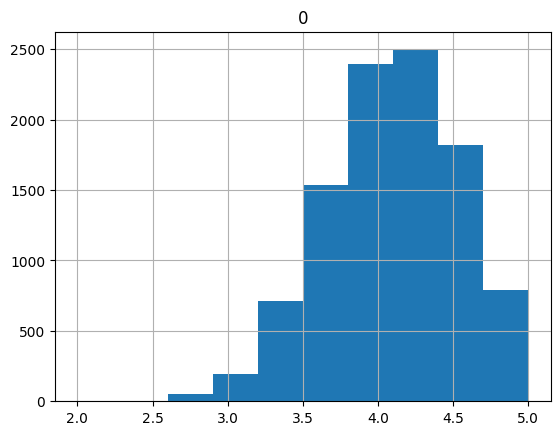

In [17]:
dataframe = pd.DataFrame(validation_prediction)
dataframe.hist()

Training set predictions

In [18]:
train_prediction = random_forest_in_greece.predict(train_X)
errors = abs(train_prediction - train_Y)

print('Mean Absolute errors:', round(np.mean(errors), 2), 'degrees.')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Mean Absolute errors: 0.42 degrees.


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished


In [19]:
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / train_Y))
accuracy = 100 - mape
accuracy

81.01814757107618

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

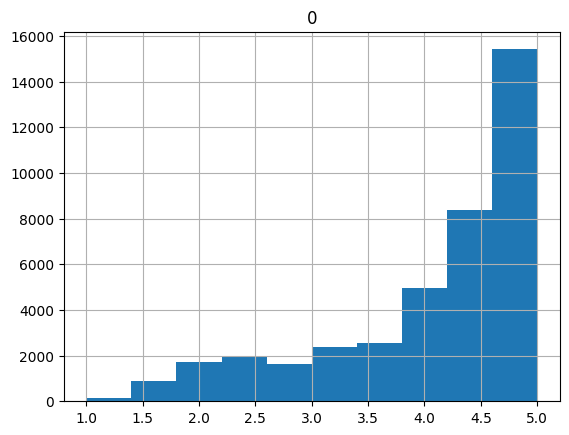

In [20]:
dataframe = pd.DataFrame(train_prediction)
dataframe.hist()